In [ ]:
nltk.download('punkt')     # Mengunduh paket punkt untuk tokenisasi
nltk.download('wordnet')   # Mengunduh WordNet
nltk.download('omw-1.4')   # Mengunduh Open Multilingual WordNet
nltk.download('stopwords')  # Mengunduh stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hendry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hendry\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hendry\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hendry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta 

In [ ]:
import pandas as pd
import re
import string
import nltk
import contractions
import matplotlib.pyplot as plt
import spacy
from spacy.language import Language  
from spacy_language_detection import LanguageDetector
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import MWETokenizer, word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

nlp_model = spacy.load("en_core_web_sm")

In [2]:
def generate_wordcloud(df, col):
    concat_str = df[col].str.cat(sep = ' ')
    wordcloud = WordCloud().generate(concat_str)
    # Generate plot
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [3]:
Book_df = pd.read_csv('../data/preprocessed_data.csv')
Book_df.head()

,book_title,book_details,Fantasy,Young Adult,Classics,Romance,Historical Fiction
0,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",True,True,False,False,False
1,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,False,True,False,False,False
2,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,True,True,False,False,False
3,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...",True,True,False,False,False
4,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,True,True,False,False,False


In [4]:
cleaned_df = Book_df.copy()

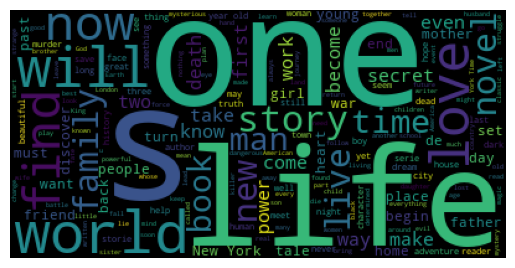

In [5]:
generate_wordcloud(cleaned_df, 'book_details')

Cleansing data

In [6]:
def expand_contractions(x):
    return ' '.join([contractions.fix(word) for word in x.split() ])

punctuation = string.punctuation+'“'+'’'

# Normalisasi
cleaned_df['book_details'] = cleaned_df['book_details'].str.lower()
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x : expand_contractions(x))
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x: re.sub(r'\d+', '', x))  # Menghapus angka
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x: re.sub(r'[^\w\s]+', ' ', x))  # Menghapus tanda baca
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())  # Menghapus multiple whitespace
cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x : ' '.join([word for word in x.split() if word not in  ['s','','isbn']]))

In [ ]:
# Tokenisasi
def tokenize_text(text):
    tokenizer = MWETokenizer(separator=' ')
    tokens = tokenizer.tokenize(word_tokenize(text))
    return tokens

cleaned_df['book_details'] = cleaned_df['book_details'].apply(tokenize_text)

,book_title,book_details,Fantasy,Young Adult,Classics,Romance,Historical Fiction
0,Harry Potter and the Half-Blood Prince,"[it, is, the, middle, of, the, summer, but, th...",True,True,False,False,False
1,Harry Potter and the Order of the Phoenix,"[harry, potter, is, about, to, start, his, fif...",False,True,False,False,False
2,Harry Potter and the Sorcerer's Stone,"[harry, potter, has, no, idea, how, famous, he...",True,True,False,False,False
3,Harry Potter and the Prisoner of Azkaban,"[harry, potter, along, with, his, best, friend...",True,True,False,False,False
4,Harry Potter and the Goblet of Fire,"[it, is, the, summer, holidays, and, soon, har...",True,True,False,False,False
...,...,...,...,...,...,...,...
11435,Heretical Fishing: A Cozy Guide to Annoying th...,"[a, world, abandoned, by, the, gods, mystifyin...",True,False,False,False,False
11436,The Art of Avoiding Your Alpha,"[my, soulmate, bought, me, a, sugar, cookie, a...",True,False,False,False,False
11437,Finistère,"[the, when, wealthy, american, adolescent, mat...",False,False,True,False,False
11438,The Descent,"[set, in, the, the, descent, asks, the, questi...",False,False,False,False,False


In [8]:
# Menghilangkan Stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

cleaned_df['book_details'] = cleaned_df['book_details'].apply(remove_stopwords)

In [9]:
# Lemmatization
def lemmatize_tokens(tokens):
    tokens_str = nlp_model(' '.join(tokens))
    tokens_li = [word for word in tokens_str]
    return " ".join([token.lemma_ for token in tokens_li])

cleaned_df['book_details'] = cleaned_df['book_details'].apply(lambda x : lemmatize_tokens(x))

Removing Non-english books

In [10]:
def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42)

Language.factory("language_detector", func=get_lang_detector)
nlp_model.add_pipe('language_detector', last=True)

In [11]:
def check_language(x):
    doc = nlp_model(x)
    detect_language = doc._.language  
    return detect_language['language'] == 'en'

cleaned_df['english_language'] = cleaned_df['book_details'].apply(lambda x: check_language(x))

In [12]:
cleaned_df['english_language'].value_counts()

english_language
True     10832
False      608
Name: count, dtype: int64

In [13]:
cleaned_df = cleaned_df[cleaned_df['english_language']].drop(columns = 'english_language')

In [14]:
cleaned_df

,book_title,book_details,Fantasy,Young Adult,Classics,Romance,Historical Fiction
0,Harry Potter and the Half-Blood Prince,middle summer unseasonal mist press windowpane...,True,True,False,False,False
1,Harry Potter and the Order of the Phoenix,harry potter start fifth year hogwart school w...,False,True,False,False,False
2,Harry Potter and the Sorcerer's Stone,harry potter idea famous raise miserable aunt ...,True,True,False,False,False
3,Harry Potter and the Prisoner of Azkaban,harry potter along good friend ron hermione st...,True,True,False,False,False
4,Harry Potter and the Goblet of Fire,summer holiday soon harry potter start fourth ...,True,True,False,False,False
...,...,...,...,...,...,...,...
11435,Heretical Fishing: A Cozy Guide to Annoying th...,world abandon god mystify cosmic force unimagi...,True,False,False,False,False
11436,The Art of Avoiding Your Alpha,soulmate buy sugar cookie going let go want ma...,True,False,False,False,False
11437,Finistère,wealthy american adolescent matthew cameron mo...,False,False,True,False,False
11438,The Descent,set descent ask question go fast fate seven tr...,False,False,False,False,False


In [17]:
cleaned_df = cleaned_df.set_index('book_title')

In [19]:
train , val = train_test_split(cleaned_df,test_size=0.10,random_state=42)

In [20]:
train.to_csv('../data/train.csv')
val.to_csv('../data/val.csv')